# Lors de l'analyse des données, nous devons répondre aux questions suivantes :

* Quels sont les pays avec un fort potentiel de clients pour nos services ?
* Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
* Dans quels pays l'entreprise doit-elle opérer en priorité ?

Je pense qu'en répondant à ces questions, nous devrions prêter attention à l'indice de développement humain ou IDH.
Il est calculé par la moyenne de trois indices quantifiant respectivement:
+ la santé / longévité (mesurées par l'espérance de vie à la naissance), qui permet de mesurer indirectement la satisfaction des besoins matériels essentiels tels que l'accès à une alimentation saine, à l'eau potable, à un logement décent, à une bonne hygiène et aux soins médicaux. 
+ le savoir ou niveau d'éducation. Il est mesuré par la durée moyenne de scolarisation pour les adultes de plus de 25 ans et la durée attendue de scolarisation pour les enfants d'âge scolaire. Il traduit la satisfaction des besoins immatériels tels que la capacité à participer aux prises de décision sur le lieu de travail ou dans la société ;
+ le niveau de vie (logarithme du revenu brut par habitant en parité de pouvoir d'achat), afin d'englober les éléments de la qualité de vie qui ne sont pas décrits par les deux premiers indices tels que la mobilité ou l'accès à la culture.

C'est à ces indicateurs que nous porterons attention lors de l'analyse.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfCountry = pd.read_csv("Desktop\OpenClassRoom\Базы_данных\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv")
dfCountry.head()
# Dans la base de données 241 rows et 32 columns

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [2]:
# Nombre de colonnes et de lignes
dfCountry.shape

(241, 32)

In [3]:
# Supprimer les variables qui ne portent aucune information

dfCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

+ Gross National Income (GNI) - Le revenu national brut (RNB) est la valeur agrégée de tous les biens et services produits au cours de l'année sur le territoire de l'État (c'est-à-dire le produit intérieur brut, le PIB), plus les revenus perçus par les citoyens et les organisations du pays de l'étranger, moins revenus exportés de pays par des citoyens et des organisations étrangers. L'un des indicateurs clés du développement économique.


In [4]:
# Voir quelles valeurs sont dans une variable "System of trade"
dfCountry['System of trade'].unique()

array(['Special trade system', 'General trade system', nan], dtype=object)

In [5]:
# Voir quelles valeurs sont dans une variable "SNA price valution"
dfCountry['SNA price valuation'].unique()

array(['Value added at basic prices (VAB)',
       'Value added at producer prices (VAP)', nan], dtype=object)

In [6]:
dfCountry = dfCountry[['Country Code','Short Name', 'Income Group', 'SNA price valuation','System of trade']]
dfCountry.head()
# il est possible d'utiliser le code df = df.drop(df[[noms de colonnes]], axis = 1),
# mais dans ce cas il y a beaucoup de colonnes


,Country Code,Short Name,Income Group,SNA price valuation,System of trade
0,ABW,Aruba,High income: nonOECD,Value added at basic prices (VAB),Special trade system
1,AFG,Afghanistan,Low income,Value added at basic prices (VAB),General trade system
2,AGO,Angola,Upper middle income,Value added at producer prices (VAP),Special trade system
3,ALB,Albania,Upper middle income,Value added at basic prices (VAB),General trade system
4,AND,Andorra,High income: nonOECD,NaN,Special trade system


In [7]:
dfCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Code         241 non-null    object
 1   Short Name           241 non-null    object
 2   Income Group         214 non-null    object
 3   SNA price valuation  197 non-null    object
 4   System of trade      200 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


In [8]:
# une autre façon de compter le nombre de valeurs manquantes
dfCountry.isnull().sum()

Country Code            0
Short Name              0
Income Group           27
SNA price valuation    44
System of trade        41
dtype: int64

In [9]:
# Vérifier les doublons
dfCountry.duplicated().unique()

array([False])

In [10]:
# Valeurs manquantes dans une colonne 'Income Group'
dfCountry[dfCountry[["Short Name", "Income Group"]].isna().any(axis=1)]

,Country Code,Short Name,Income Group,SNA price valuation,System of trade
5,ARB,Arab World,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN,NaN
63,EMU,Euro area,NaN,NaN,NaN
68,EUU,European Union,NaN,NaN,NaN
78,GIB,Gibraltar,NaN,NaN,NaN
89,HIC,High income,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN,NaN


In [11]:
# Il y a des erreurs lexicales dans les noms des pays. De plus, les pays avec des valeurs manquantes ne présentent pas d'intérêt, 
# nous pouvons donc les retirer de l'analyse.
dfCountry=dfCountry.dropna(axis=0, how='all', subset=['Income Group'])
dfCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 240
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Code         214 non-null    object
 1   Short Name           214 non-null    object
 2   Income Group         214 non-null    object
 3   SNA price valuation  197 non-null    object
 4   System of trade      200 non-null    object
dtypes: object(5)
memory usage: 10.0+ KB


In [12]:
# Voir quelles valeurs sont dans une variable "Income Group"
dfCountry["Income Group"].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income',
       'Lower middle income', 'High income: OECD'], dtype=object)

+ L'Organisation de coopération et de développement économiques est une organisation internationale d'études économiques, dont les pays membres — des pays développés pour la plupart — ont en commun un système de gouvernement démocratique et une économie de marché.
+ Consideration of high and upper middle income countries.

In [13]:
dfCountry=dfCountry[(dfCountry["Income Group"]=='High income: OECD')|(dfCountry["Income Group"]=='Upper middle income')]
dfCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 2 to 238
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Code         86 non-null     object
 1   Short Name           86 non-null     object
 2   Income Group         86 non-null     object
 3   SNA price valuation  85 non-null     object
 4   System of trade      85 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [14]:
# Nous obtenons 86 pays, mais nous devons sélectionner les pays prioritaires, nous ne laissons donc 
# que les pays avec le niveau élevé
dfCountry=dfCountry[(dfCountry["Income Group"]=='High income: OECD')]

In [15]:
dfCountry.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 11 to 227
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Code         31 non-null     object
 1   Short Name           31 non-null     object
 2   Income Group         31 non-null     object
 3   SNA price valuation  31 non-null     object
 4   System of trade      31 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [16]:
dfCountry

,Country Code,Short Name,Income Group,SNA price valuation,System of trade
11,AUS,Australia,High income: OECD,Value added at basic prices (VAB),General trade system
12,AUT,Austria,High income: OECD,Value added at basic prices (VAB),Special trade system
15,BEL,Belgium,High income: OECD,Value added at basic prices (VAB),Special trade system
33,CAN,Canada,High income: OECD,Value added at basic prices (VAB),General trade system
34,CHE,Switzerland,High income: OECD,Value added at basic prices (VAB),Special trade system
36,CHL,Chile,High income: OECD,Value added at basic prices (VAB),Special trade system
50,CZE,Czech Republic,High income: OECD,Value added at basic prices (VAB),Special trade system
51,DEU,Germany,High income: OECD,Value added at basic prices (VAB),Special trade system
54,DNK,Denmark,High income: OECD,Value added at basic prices (VAB),Special trade system
65,ESP,Spain,High income: OECD,Value added at basic prices (VAB),Special trade system


Il convient de noter qu'il y a eu historiquement deux systèmes comptables dans les statistiques du commerce international de marchandises - le "système commercial général" et le "système commercial spécial".

Le système commercial général est appliqué lorsque le territoire statistique d'un pays, c'est-à-dire le territoire pour lequel les données sont collectées, coïncide avec son territoire économique. Par conséquent, dans le cadre d'un système commercial commun, les importations comprennent toutes les marchandises importées sur le territoire économique d'un pays donné, et les exportations - toutes les marchandises exportées de son territoire économique.

Un système commercial spécial est utilisé lorsque le territoire statistique ne représente qu'une certaine partie du territoire économique du pays.

L'utilisation par les pays de différents systèmes de comptabilité commerciale entraîne des incohérences dans les données nationales.

Pour une analyse plus complète, un économiste d'entreprise devrait y prêter attention.

<AxesSubplot:ylabel='System of trade'>

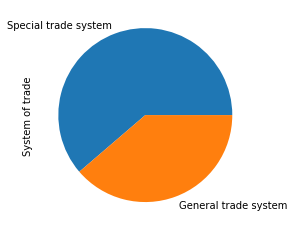

In [17]:
dfCountry['System of trade'].value_counts(normalize=True).plot(kind='pie')

In [18]:
countryGeneral=dfCountry['Short Name'][(dfCountry['System of trade'] == 'General trade system')]
countrySpecial=dfCountry['Short Name'][(dfCountry['System of trade']== 'Special trade system')]
print("Pays avec un système commercial commun:", countryGeneral)

print("Pays avec un système commercial spécial", countrySpecial)

Pays avec un système commercial commun: 11          Australia
33             Canada
69            Finland
75     United Kingdom
99            Ireland
102           Iceland
107             Japan
114             Korea
164            Norway
167       New Zealand
205            Sweden
227     United States
Name: Short Name, dtype: object
Pays avec un système commercial spécial 12             Austria
15             Belgium
34         Switzerland
36               Chile
50      Czech Republic
51             Germany
54             Denmark
65               Spain
66             Estonia
71              France
83              Greece
103             Israel
104              Italy
131         Luxembourg
163        Netherlands
176             Poland
179           Portugal
203    Slovak Republic
204           Slovenia
Name: Short Name, dtype: object


In [19]:
print(dfCountry['Country Code'])

11     AUS
12     AUT
15     BEL
33     CAN
34     CHE
36     CHL
50     CZE
51     DEU
54     DNK
65     ESP
66     EST
69     FIN
71     FRA
75     GBR
83     GRC
99     IRL
102    ISL
103    ISR
104    ITA
107    JPN
114    KOR
131    LUX
163    NLD
164    NOR
167    NZL
176    POL
179    PRT
203    SVK
204    SVN
205    SWE
227    USA
Name: Country Code, dtype: object


In [20]:
dfCountry['Short Name']

11           Australia
12             Austria
15             Belgium
33              Canada
34         Switzerland
36               Chile
50      Czech Republic
51             Germany
54             Denmark
65               Spain
66             Estonia
69             Finland
71              France
75      United Kingdom
83              Greece
99             Ireland
102            Iceland
103             Israel
104              Italy
107              Japan
114              Korea
131         Luxembourg
163        Netherlands
164             Norway
167        New Zealand
176             Poland
179           Portugal
203    Slovak Republic
204           Slovenia
205             Sweden
227      United States
Name: Short Name, dtype: object

In [21]:
dfSeries = pd.read_csv("Desktop\OpenClassRoom\Базы_данных\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv")
dfSeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [22]:
dfSeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

Le deuxième tableau ne porte pas de charge sémantique pour l'analyse.

In [23]:
dfStatsData = pd.read_csv("Desktop\OpenClassRoom\Базы_данных\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv")
dfStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Nombre de colonnes et de lignes
dfStatsData.shape

(886930, 70)

Pour une analyse plus approfondie, nous considérerons 2015-2020. Il convient de prêter attention à l'état de crise de l'économie mondiale, qui s'est fortement manifesté depuis 2008. Différents pays et régions sont sortis de la phase aiguë de la crise à des moments différents, de 2009 à 2013, et ses conséquences persistent à ce jour. Par conséquent, les 5 dernières années sont prises pour analyse.

In [25]:
dfStatsData = dfStatsData[['Country Name', 'Country Code', 'Indicator Name','2015', '2016', '2017', '2020']]
dfStatsData

,Country Name,Country Code,Indicator Name,2015,2016,2017,2020
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",NaN,NaN,NaN,NaN


In [26]:
# Je supprime les lignes où les valeurs sont complètement manquantes (en variables au fil des années)
dfStatsData.dropna(axis=0, how='all', subset=['2015','2016','2017','2020'])

,Country Name,Country Code,Indicator Name,2015,2016,2017,2020
2483,Arab World,ARB,"Population, ages 15-64 (% of total)",6.243928e+01,NaN,NaN,NaN
4907,East Asia & Pacific,EAS,GDP at market prices (constant 2005 US$),2.105782e+13,2.192317e+13,NaN,NaN
4908,East Asia & Pacific,EAS,GDP at market prices (current US$),2.176695e+13,2.248043e+13,NaN,NaN
4909,East Asia & Pacific,EAS,GDP per capita (constant 2005 US$),9.231014e+03,9.545150e+03,NaN,NaN
4910,East Asia & Pacific,EAS,GDP per capita (current US$),9.541871e+03,9.787776e+03,NaN,NaN
...,...,...,...,...,...,...,...
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,7.215600e+02,NaN,NaN,660.67
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,1.474430e+03,NaN,NaN,1360.77
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,1.722960e+03,NaN,NaN,2052.78
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,1.873550e+03,NaN,NaN,2154.54


In [27]:
# I leave only high and upper middle income countries in the tables
valid_countries = ['AUS','AUT','BEL','CAN','CHE','CHL','CZE','DEU','DNK','ESP','EST','FIN','FRA','GBR','GRC','IRL','ISL','ISR',
    'ITA','JPN','KOR','LUX','NLD','NOR','NZL','POL','PRT','SVK','SVN','SWE','USA']


In [28]:
mask = dfStatsData['Country Code'].isin(valid_countries)
dfStatsData=dfStatsData.loc[mask]
dfStatsData

,Country Name,Country Code,Indicator Name,2015,2016,2017,2020
128275,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
128276,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
128277,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
128278,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",97.160408,NaN,NaN,NaN
...,...,...,...,...,...,...,...
850275,United States,USA,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN
850276,United States,USA,"Youth literacy rate, population 15-24 years, b...",NaN,NaN,NaN,NaN
850277,United States,USA,"Youth literacy rate, population 15-24 years, f...",NaN,NaN,NaN,NaN
850278,United States,USA,"Youth literacy rate, population 15-24 years, g...",NaN,NaN,NaN,NaN


In [29]:
dfStatsData = dfStatsData.dropna(axis=0, how='all', subset=['2015','2016','2017','2020'])
dfStatsData.head()

,Country Name,Country Code,Indicator Name,2015,2016,2017,2020
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",97.160408,NaN,NaN,NaN
128280,Australia,AUS,"Adjusted net enrolment rate, primary, female (%)",97.480904,NaN,NaN,NaN
128282,Australia,AUS,"Adjusted net enrolment rate, primary, male (%)",96.856667,NaN,NaN,NaN
128408,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523,NaN,NaN,NaN
128409,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523,NaN,NaN,NaN


In [30]:
dfStatsData.duplicated().sum()

0

In [31]:
dfStatsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25727 entries, 128279 to 850271
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    25727 non-null  object 
 1   Country Code    25727 non-null  object 
 2   Indicator Name  25727 non-null  object 
 3   2015            25392 non-null  float64
 4   2016            2582 non-null   float64
 5   2017            0 non-null      float64
 6   2020            9548 non-null   float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


In [32]:
# Je supprime des variables où de nombreuses valeurs manquent
dfStatsData = dfStatsData.drop(['2017', '2016', '2020'],1)
dfStatsData

,Country Name,Country Code,Indicator Name,2015
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",97.160408
128280,Australia,AUS,"Adjusted net enrolment rate, primary, female (%)",97.480904
128282,Australia,AUS,"Adjusted net enrolment rate, primary, male (%)",96.856667
128408,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523
128409,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523
...,...,...,...,...
850267,United States,USA,Wittgenstein Projection: Population in thousan...,5032.700000
850268,United States,USA,Wittgenstein Projection: Population in thousan...,9471.060000
850269,United States,USA,Wittgenstein Projection: Population in thousan...,67158.610000
850270,United States,USA,Wittgenstein Projection: Population in thousan...,65022.600000


In [33]:
dfStatsData = dfStatsData.dropna(axis=0, how='any')
dfStatsData.head() 

,Country Name,Country Code,Indicator Name,2015
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",97.160408
128280,Australia,AUS,"Adjusted net enrolment rate, primary, female (%)",97.480904
128282,Australia,AUS,"Adjusted net enrolment rate, primary, male (%)",96.856667
128408,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523
128409,Australia,AUS,Annual statutory teacher salaries in public in...,59424.688523


In [34]:
dfStatsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 128279 to 850271
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    25392 non-null  object 
 1   Country Code    25392 non-null  object 
 2   Indicator Name  25392 non-null  object 
 3   2015            25392 non-null  float64
dtypes: float64(1), object(3)
memory usage: 991.9+ KB


In [35]:
dfStatsData['Indicator Name'].nunique()

1118

In [36]:
dfStatsData.shape


(25392, 4)

In [37]:
dfStatsFootNote = pd.read_csv("Desktop\OpenClassRoom\Базы_данных\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv")
dfStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [38]:
dfStatsFootNote = dfStatsFootNote[['CountryCode', 'SeriesCode', 'Year']]
dfStatsFootNote

,CountryCode,SeriesCode,Year
0,ABW,SE.PRE.ENRL.FE,YR2001
1,ABW,SE.TER.TCHR.FE,YR2005
2,ABW,SE.PRE.TCHR.FE,YR2000
3,ABW,SE.SEC.ENRL.GC,YR2004
4,ABW,SE.PRE.TCHR,YR2006
...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007
643634,ZWE,SH.DYN.MORT,YR2014
643635,ZWE,SH.DYN.MORT,YR2015
643636,ZWE,SH.DYN.MORT,YR2017


In [39]:
dfStatsFootNote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [40]:
# Je quitte la recherche 2015, car c'est cette année que j'ai distingué au départ pour la recherche.
dfStatsFootNote=dfStatsFootNote[(dfStatsFootNote['Year']=='YR2015')]
dfStatsFootNote.info()                              

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6348 entries, 510 to 643635
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  6348 non-null   object
 1   SeriesCode   6348 non-null   object
 2   Year         6348 non-null   object
dtypes: object(3)
memory usage: 198.4+ KB


In [41]:
# Je laisse dans la base de données les pays qui ont été sélectionnés pour analyse
mask = dfStatsFootNote['CountryCode'].isin(valid_countries)
dfStatsFootNote=dfStatsFootNote.loc[mask]
dfStatsFootNote.head()

,CountryCode,SeriesCode,Year
22636,AUS,SP.POP.TOTL.MA.ZS,YR2015
22673,AUS,SP.POP.TOTL.MA.IN,YR2015
22722,AUS,SP.POP.TOTL.FE.ZS,YR2015
22771,AUS,SP.POP.TOTL.FE.IN,YR2015
22820,AUS,SP.POP.1564.TO.ZS,YR2015


In [42]:
dfStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 22636 to 615246
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  608 non-null    object
 1   SeriesCode   608 non-null    object
 2   Year         608 non-null    object
dtypes: object(3)
memory usage: 19.0+ KB


In [43]:
dfStatsSeries = pd.read_csv("Desktop\OpenClassRoom\Базы_данных\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv")
dfStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dfStatsSeries.shape

(3665, 21)

In [45]:
dfStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [46]:
dfStatsSeries=dfStatsSeries.drop(['Unit of measure', 'Notes from original source', 'Development relevance', 'Other web links',
                                 'Related indicators', 'License Type', 'Unnamed: 20', 'Source', 'Related source links',
                                 'General comments', 'Periodicity', 'Other notes', 'Aggregation method', 'Base Period',
                                 'Limitations and exceptions', 'Statistical concept and methodology'], 1)

In [47]:
dfStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Series Code       3665 non-null   object
 1   Topic             3665 non-null   object
 2   Indicator Name    3665 non-null   object
 3   Short definition  2156 non-null   object
 4   Long definition   3665 non-null   object
dtypes: object(5)
memory usage: 143.3+ KB


In [48]:
dfStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...


In [49]:
dfStatsSeries.shape


(3665, 5)

In [50]:
dictionary={'Series Code': 'SeriesCode'}
dfStatsSeries=dfStatsSeries.rename(dictionary, axis=1)


In [51]:
dfStats= dfStatsFootNote.merge(right=dfStatsSeries, on='SeriesCode', how='left')
dfStats

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Short definition,Long definition
0,AUS,SP.POP.TOTL.MA.ZS,YR2015,Health: Population: Structure,"Population, male (% of total)",NaN,Male population is the percentage of the popul...
1,AUS,SP.POP.TOTL.MA.IN,YR2015,Health: Population: Structure,"Population, male",NaN,Male population is based on the de facto defin...
2,AUS,SP.POP.TOTL.FE.ZS,YR2015,Health: Population: Structure,"Population, female (% of total)",NaN,Female population is the percentage of the pop...
3,AUS,SP.POP.TOTL.FE.IN,YR2015,Health: Population: Structure,"Population, female",NaN,Female population is based on the de facto def...
4,AUS,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),NaN,Total population between the ages 15 to 64 as ...
...,...,...,...,...,...,...,...
603,USA,SABER.EMIS.GOAL4,YR2015,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...
604,USA,SABER.EMIS.GOAL4.LVL1,YR2015,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...
605,USA,SABER.EMIS.GOAL4.LVL2,YR2015,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...
606,USA,SABER.EMIS.GOAL4.LVL3,YR2015,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...


In [52]:
dfStats.shape

(608, 7)

In [53]:
dfStats['Topic'].unique()

array(['Health: Population: Structure', 'Teachers',
       'Health: Risk factors', 'Health: Population: Dynamics', 'Primary',
       'Health: Mortality', 'Tertiary', 'Learning Outcomes', 'Literacy',
       nan, 'Education Management Information Systems (SABER)'],
      dtype=object)

In [54]:
dfStats['Indicator Name'][(dfStats['Topic']=='Health: Population: Structure')].unique()

array(['Population, male (% of total)', 'Population, male',
       'Population, female (% of total)', 'Population, female',
       'Population ages 15-64 (% of total)',
       'Population ages 15-64, total', 'Population ages 15-64, male',
       'Population ages 15-64, female',
       'Population ages 0-14 (% of total)', 'Population ages 0-14, total',
       'Population ages 0-14, male', 'Population ages 0-14, female',
       'Population, total'], dtype=object)

In [55]:
# Je crée une nouvelle base de données avec des métriques importantes pour l'analyse
df1=dfStats[(dfStats['Indicator Name']== 'Population ages 15-64 (% of total)')| 
              (dfStats['Indicator Name']== 'Population ages 15-64, total')]
df1.head(2)

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Short definition,Long definition
4,AUS,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),NaN,Total population between the ages 15 to 64 as ...
5,AUS,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",NaN,Total population between the ages 15 to 64. Po...


In [56]:
dfStats['Indicator Name'][(dfStats['Topic']=='Teachers')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 10 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 15 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Top of scale',
       'Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary',
       'Annual statutory teacher salaries in public institutions in USD. Primary. 10 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Primary. 15 years of experience',
       'Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale',
       'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary',
       'Annual statutory teacher salaries in public in

In [57]:
dfStats['Indicator Name'][(dfStats['Topic']=='Health: Risk factors')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['Prevalence of HIV, total (% of population ages 15-49)'],
      dtype=object)

In [58]:
dfStats['Indicator Name'][(dfStats['Topic']=='Health: Population: Dynamics')].unique()

array(['Population growth (annual %)'], dtype=object)

In [59]:
dfStats['Long definition'][(dfStats['Topic']=='Health: Population: Dynamics')].unique()

array(['Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.'],
      dtype=object)

In [60]:
df2= dfStats[(dfStats['Topic']=='Health: Population: Dynamics')]
df2.head()

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Short definition,Long definition
29,AUS,SP.POP.GROW,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...
200,EST,SP.POP.GROW,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...
249,FRA,SP.POP.GROW,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...
281,IRL,SP.POP.GROW,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...


In [61]:
dfStats['Indicator Name'][(dfStats['Topic']=='Primary')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Out-of-school children of primary school age, both sexes (number)',
       'Out-of-school children of primary school age, female (number)',
       'Out-of-school children of primary school age, male (number)',
       'Net enrolment rate, primary, both sexes (%)'], dtype=object)

In [62]:
dfStats['Indicator Name'][(dfStats['Topic']=='Health: Mortality')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['Mortality rate, under-5 (per 1,000 live births)'], dtype=object)

In [63]:
dfStats['Indicator Name'][(dfStats['Topic']=='Tertiary')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['School life expectancy, primary to tertiary, both sexes (years)',
       'School life expectancy, primary to tertiary, female (years)',
       'School life expectancy, primary to tertiary, male (years)'],
      dtype=object)

In [64]:
dfStats['Indicator Name'][(dfStats['Topic']=='Learning Outcomes')].unique() 

array(['TIMSS: Fourth grade students reaching the high international benchmark of science achievement (%)',
       'TIMSS: Fourth grade students reaching the intermediate international benchmark of science achievement (%)',
       'TIMSS: Fourth grade students reaching the low international benchmark of science achievement (%)',
       'TIMSS: Mean performance on the science scale for fourth grade students, male',
       'TIMSS: Fourth grade students reaching the low international benchmark of mathematics achievement (%)',
       'TIMSS: Mean performance on the mathematics scale for fourth grade students, male',
       'TIMSS: Mean performance on the science scale for fourth grade students, total',
       'TIMSS: Fourth grade students reaching the advanced international benchmark of science achievement (%)',
       'TIMSS: Fourth grade students who did not reach the low international benchmark of science achievement (%)',
       'TIMSS: Mean performance on the science scale for fourth 

In [65]:
df3=dfStats[(dfStats['Indicator Name']== 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total')| 
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the advanced international benchmark of mathematics achievement (%)')|
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students who did not reach the low international benchmark of mathematics achievement (%)')|
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the high international benchmark of mathematics achievement (%)') |
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the intermediate international benchmark of mathematics achievement (%)') | 
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the low international benchmark of mathematics achievement (%)') |
            (dfStats['Indicator Name']== 'TIMSS: Mean performance on the science scale for eighth grade students, total') |
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the advanced international benchmark of science achievement (%)')|
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students who did not reach the low international benchmark of science achievement (%)') |
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the high international benchmark of science achievement (%)') |
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the intermediate international benchmark of science achievement (%)') |
            (dfStats['Indicator Name']== 'TIMSS: Eighth grade students reaching the low international benchmark of science achievement (%)')|
            (dfStats['Indicator Name']== 'PIAAC: Adults by literacy proficiency level (%). Level 5')|
            (dfStats['Indicator Name']== 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment')]
         
df3.head(2)

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Short definition,Long definition
59,CAN,LO.TIMSS.MAT8,YR2015,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...
60,CAN,LO.TIMSS.MAT8.ADV,YR2015,Learning Outcomes,TIMSS: Eighth grade students reaching the adva...,NaN,TIMSS: Eighth grade students reaching the adva...


In [66]:
dfStats['Indicator Name'][(dfStats['Topic']=='Literacy')].unique() 

array(['Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Adult literacy rate, population 15+ years, female (%)',
       'Adult literacy rate, population 15+ years, male (%)',
       'Adult literacy rate, population 15+ years, both sexes (%)',
       'Adult illiterate population, 15+ years, male (number)',
       'Elderly illiterate population, 65+ years, female (number)',
       'Youth illiterate population, 15-24 years, % female',
       'Elderly literacy rate, population 65+ years, both sexes (%)',
       'Elderly literacy rate, population 65+ years, gender parity index (GPI)'],
      dtype=object)

In [67]:
df4=dfStats[(dfStats['Indicator Name']== 'Youth literacy rate, population 15-24 years, gender parity index (GPI)')| 
            (dfStats['Indicator Name']== 'Youth literacy rate, population 15-24 years, both sexes (%)')|
            (dfStats['Indicator Name']== 'Adult literacy rate, population 15+ years, both sexes (%)')]
df4.head(2)

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Short definition,Long definition
92,CHL,SE.ADT.1524.LT.FM.ZS,YR2015,Literacy,"Youth literacy rate, population 15-24 years, g...",NaN,Ratio of female youth literacy rate to male yo...
94,CHL,SE.ADT.1524.LT.ZS,YR2015,Literacy,"Youth literacy rate, population 15-24 years, b...",NaN,Number of people age 15 to 24 years who can bo...


In [68]:
dfStats['Indicator Name'][(dfStats['Topic']=='Education Management Information Systems (SABER)')].unique()
# Cet indicateur n'est pas pertinent pour l'analyse.

array(['SABER: (Education Management Information Systems) Policy Goal 1: Enabling Environment',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 1: Legal Framework',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 2: Organizational Structure',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 3: Human Resources',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 4: Infrastructural capacity',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 5: Budget',
       'SABER: (Education Management Information Systems) Policy Goal 1 Lever 6: Data-driven Culture',
       'SABER: (Education Management Information Systems) Policy Goal 2: System Soundness',
       'SABER: (Education Management Information Systems) Policy Goal 2 Lever 1: Data Architecture',
       'SABER: (Education Management Information Systems) Policy Goal 2 Lever 2: Data Coverage',
       

In [69]:
df_new = pd.concat([df1, df2, df3, df4], axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 4 to 501
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CountryCode       84 non-null     object
 1   SeriesCode        84 non-null     object
 2   Year              84 non-null     object
 3   Topic             84 non-null     object
 4   Indicator Name    84 non-null     object
 5   Short definition  19 non-null     object
 6   Long definition   84 non-null     object
dtypes: object(7)
memory usage: 5.2+ KB


In [70]:
df_new=df_new.drop('Short definition',1)
df_new.head()

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Long definition
4,AUS,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),Total population between the ages 15 to 64 as ...
5,AUS,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...
158,ESP,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),Total population between the ages 15 to 64 as ...
159,ESP,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...
238,FIN,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...


In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 4 to 501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CountryCode      84 non-null     object
 1   SeriesCode       84 non-null     object
 2   Year             84 non-null     object
 3   Topic            84 non-null     object
 4   Indicator Name   84 non-null     object
 5   Long definition  84 non-null     object
dtypes: object(6)
memory usage: 4.6+ KB


In [72]:
dfStatsData.head(2)

,Country Name,Country Code,Indicator Name,2015
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",97.160408
128280,Australia,AUS,"Adjusted net enrolment rate, primary, female (%)",97.480904


In [73]:
df_new.head()

,CountryCode,SeriesCode,Year,Topic,Indicator Name,Long definition
4,AUS,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),Total population between the ages 15 to 64 as ...
5,AUS,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...
158,ESP,SP.POP.1564.TO.ZS,YR2015,Health: Population: Structure,Population ages 15-64 (% of total),Total population between the ages 15 to 64 as ...
159,ESP,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...
238,FIN,SP.POP.1564.TO,YR2015,Health: Population: Structure,"Population ages 15-64, total",Total population between the ages 15 to 64. Po...


In [74]:
df_new = df_new.drop('SeriesCode', 1)

In [75]:
df= df_new.merge(right=dfStatsData, on='Indicator Name', how='inner')
df.head()

,CountryCode,Year,Topic,Indicator Name,Long definition,Country Name,Country Code,2015
0,AUS,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Australia,AUS,1.391107
1,AUS,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Austria,AUT,1.066623
2,AUS,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Belgium,BEL,0.579446
3,AUS,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Canada,CAN,0.851756
4,AUS,YR2015,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Chile,CHL,0.841711


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryCode      754 non-null    object 
 1   Year             754 non-null    object 
 2   Topic            754 non-null    object 
 3   Indicator Name   754 non-null    object 
 4   Long definition  754 non-null    object 
 5   Country Name     754 non-null    object 
 6   Country Code     754 non-null    object 
 7   2015             754 non-null    float64
dtypes: float64(1), object(7)
memory usage: 53.0+ KB


In [77]:
df=df.drop(['CountryCode', 'Year'],1)

In [78]:
dictionary={"2015" : "Year 2015"}
df = df.rename(dictionary, axis=1)
df.head(2)

,Topic,Indicator Name,Long definition,Country Name,Country Code,Year 2015
0,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Australia,AUS,1.391107
1,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,Austria,AUT,1.066623


In [79]:
df=df[['Country Code', 'Country Name', 'Topic', 'Indicator Name', 'Long definition', 'Year 2015']]


In [80]:
df.head()

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
0,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
1,AUT,Austria,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.066623
2,BEL,Belgium,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.579446
3,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
4,CHL,Chile,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.841711


In [81]:
df.duplicated().sum()

556

In [82]:
df = df.drop_duplicates(['Country Code', 'Country Name', 'Topic', 'Indicator Name', 'Long definition', 'Year 2015'], 
                        keep='last')

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 93 to 753
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     198 non-null    object 
 1   Country Name     198 non-null    object 
 2   Topic            198 non-null    object 
 3   Indicator Name   198 non-null    object 
 4   Long definition  198 non-null    object 
 5   Year 2015        198 non-null    float64
dtypes: float64(1), object(5)
memory usage: 10.8+ KB


In [84]:
df.head()

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
94,AUT,Austria,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.066623
95,BEL,Belgium,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.579446
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
97,CHL,Chile,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.841711


In [85]:
df['Indicator Name'].unique()

array(['Population growth (annual %)',
       'TIMSS: Mean performance on the mathematics scale for eighth grade students, total',
       'TIMSS: Eighth grade students reaching the advanced international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students who did not reach the low international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the high international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the intermediate international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the low international benchmark of mathematics achievement (%)',
       'TIMSS: Mean performance on the science scale for eighth grade students, total',
       'TIMSS: Eighth grade students reaching the advanced international benchmark of science achievement (%)',
       'TIMSS: Eighth grade students who did not reach the low international benchmark of 

In [86]:
dfPopulation=df[(df['Indicator Name']=='Population growth (annual %)')]
dfPopulation.head(31)

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
94,AUT,Austria,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.066623
95,BEL,Belgium,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.579446
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
97,CHL,Chile,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.841711
98,CZE,Czech Republic,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.196589
99,DNK,Denmark,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.706424
100,EST,Estonia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.065553
101,FIN,Finland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.329384
102,FRA,France,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.439411


In [87]:
dfPopulation.shape

(31, 6)

+ Les changements dans la taille de la population affectent les pays à développement élevé et faible de différentes manières. Par exemple, W. Peterson (2017), utilisant des données historiques sur les 200 dernières années, montre qu'une faible croissance démographique dans les pays à revenu élevé peut créer des problèmes sociaux et économiques.
+ La population joue un rôle important dans la croissance économique. La croissance ou le déclin de la population, la migration, l'urbanisation, l'automatisation et le vieillissement affectent les taux de production et de consommation. Des taux de croissance démographique plus élevés augmentent la main-d'œuvre qui peut produire plus de production et contribuer à la croissance du PIB. En effet, la croissance démographique peut être considérée non seulement comme une augmentation des producteurs mais aussi des consommateurs. Cet indicateur est important car il stimule non seulement la production et influence sa diversité, mais influence également les décisions d'investissement. Une faible croissance démographique peut avoir un effet négatif.

In [88]:
dfPopulation.sort_values(['Year 2015'], ascending = False)

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
111,LUX,Luxembourg,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,2.359951
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289
113,NZL,New Zealand,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.889045
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772
121,CHE,Switzerland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.138337
94,AUT,Austria,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.066623
120,SWE,Sweden,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.057455
105,ISL,Iceland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.041940
114,NOR,Norway,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.995085


In [89]:
dfPopulation=dfPopulation[(dfPopulation['Year 2015'] > 0.439411)]
dfPopulation.head(31)

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
94,AUT,Austria,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.066623
95,BEL,Belgium,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.579446
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
97,CHL,Chile,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.841711
99,DNK,Denmark,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.706424
103,DEU,Germany,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.865703
105,ISL,Iceland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.041940
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289


In [90]:
dfPopulation['Country Name']

93          Australia
94            Austria
95            Belgium
96             Canada
97              Chile
99            Denmark
103           Germany
105           Iceland
106           Ireland
107            Israel
110       Korea, Rep.
111        Luxembourg
112       Netherlands
113       New Zealand
114            Norway
120            Sweden
121       Switzerland
122    United Kingdom
123     United States
Name: Country Name, dtype: object

In [91]:
dfPopulation['Country Code'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'DNK', 'DEU', 'ISL', 'IRL',
       'ISR', 'KOR', 'LUX', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR',
       'USA'], dtype=object)

In [92]:
valid_countries =['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'DNK', 'DEU', 'ISL', 'IRL','ISR', 
                  'KOR', 'LUX', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR','USA']

In [93]:
mask = df['Country Code'].isin(valid_countries)
df=df.loc[mask]
df.shape

(144, 6)

In [94]:
df['Indicator Name'].unique()

array(['Population growth (annual %)',
       'TIMSS: Mean performance on the mathematics scale for eighth grade students, total',
       'TIMSS: Eighth grade students reaching the advanced international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students who did not reach the low international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the high international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the intermediate international benchmark of mathematics achievement (%)',
       'TIMSS: Eighth grade students reaching the low international benchmark of mathematics achievement (%)',
       'TIMSS: Mean performance on the science scale for eighth grade students, total',
       'TIMSS: Eighth grade students reaching the advanced international benchmark of science achievement (%)',
       'TIMSS: Eighth grade students who did not reach the low international benchmark of 

Regardons la performance moyenne des élèves sur l'échelle des sciences et sur l'échelle des mathématiques. Le point central de l'échelle est 500. Laissons pour une analyse plus approfondie les pays dont le point central est supérieur à 500.

In [95]:
dfMeanMath=df[(df['Indicator Name']=='TIMSS: Mean performance on the mathematics scale for eighth grade students, total')]
dfMeanMath.head()


,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
202,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,505.0
203,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,527.0
204,CHL,Chile,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,427.0
205,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,523.0
206,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,511.0


In [96]:
dfMeanMath=dfMeanMath[(dfMeanMath['Year 2015'] > 500.0)]
dfMeanMath

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
202,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,505.0
203,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,527.0
205,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,523.0
206,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,511.0
209,KOR,"Korea, Rep.",Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,606.0
213,SWE,Sweden,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,501.0
214,USA,United States,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,518.0


In [97]:
dfMeanMath['Country Code'].unique()

array(['AUS', 'CAN', 'IRL', 'ISR', 'KOR', 'SWE', 'USA'], dtype=object)

In [98]:
valid_countries =['AUS', 'CAN', 'CHL', 'IRL', 'ISR', 'KOR', 'NZL', 'NOR', 'SWE', 'USA']

In [99]:
mask = df['Country Code'].isin(valid_countries)
df=df.loc[mask]
df.shape

(135, 6)

In [100]:
dfMeanScience=df[(df['Indicator Name']=='TIMSS: Mean performance on the science scale for eighth grade students, total')]
dfMeanScience.head(31)


,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
527,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,512.0
528,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,526.0
529,CHL,Chile,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,454.0
530,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,530.0
531,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,507.0
534,KOR,"Korea, Rep.",Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,556.0
535,NZL,New Zealand,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,513.0
536,NOR,Norway,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,489.0
538,SWE,Sweden,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,522.0
539,USA,United States,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,530.0


In [101]:
dfMeanScience=dfMeanScience[(dfMeanScience['Year 2015'] > 500.0)]
dfMeanScience.head(10)

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
527,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,512.0
528,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,526.0
530,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,530.0
531,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,507.0
534,KOR,"Korea, Rep.",Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,556.0
535,NZL,New Zealand,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,513.0
538,SWE,Sweden,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,522.0
539,USA,United States,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,530.0


In [102]:
dfMeanMath['Country Code'].unique()

array(['AUS', 'CAN', 'IRL', 'ISR', 'KOR', 'SWE', 'USA'], dtype=object)

In [103]:
valid_countries =['AUS', 'CAN', 'IRL', 'ISR', 'KOR', 'SWE', 'USA']

In [104]:
mask = df['Country Code'].isin(valid_countries)
df=df.loc[mask]
df.shape

(93, 6)

In [105]:
df=df[(df['Indicator Name'] == 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total') |
      (df['Indicator Name'] == 'TIMSS: Mean performance on the science scale for eighth grade students, total') |
      (df['Indicator Name'] == 'Population growth (annual %)')]

In [106]:
df.shape

(21, 6)

In [107]:
df.head()

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289
110,KOR,"Korea, Rep.",Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.527288


In [108]:
df['Country Name'].unique()

array(['Australia', 'Canada', 'Ireland', 'Israel', 'Korea, Rep.',
       'Sweden', 'United States'], dtype=object)

In [109]:
df['Indicator Name'].unique()


array(['Population growth (annual %)',
       'TIMSS: Mean performance on the mathematics scale for eighth grade students, total',
       'TIMSS: Mean performance on the science scale for eighth grade students, total'],
      dtype=object)

In [110]:
df['Long definition'].unique()

array(['Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.',
       'TIMSS: Mean performance on the mathematics scale for eighth grade students, total is the average scale score for 8th graders on the mathematics assessment. The scale centerpoint is 500. Data reflects country performance in the stated year according to TIMSS reports, but may not be comparable across years or countries. Consult the TIMSS website for more detailed information: http://timss.bc.edu/',
       'TIMSS: Mean performance on the science scale for eighth grade students, total is the average scale score for 8th graders on the science assessment. The scale centerpoint is 500. Data reflects country performance in the stated year according to TIMSS reports, but may not be comparable across years

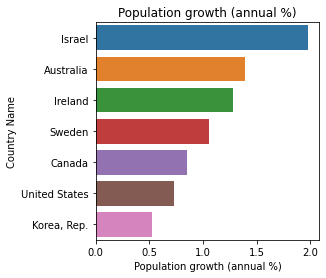

In [111]:
plt.figure(figsize = (4,4))
plt.title("Population growth (annual %)")
population = df[(df['Indicator Name'] == 'Population growth (annual %)')]
population = population.sort_values('Year 2015', ascending=False)
sns.barplot(y=population['Country Name'], x = population['Year 2015'], data = population)

plt.ylabel("Country Name")
plt.xlabel("Population growth (annual %)");



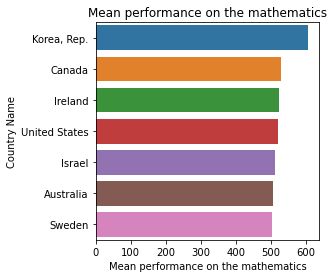

In [112]:
plt.figure(figsize = (4,4))
plt.title("Mean performance on the mathematics")
population = df[(df['Indicator Name'] == 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total')]
population = population.sort_values('Year 2015', ascending=False)
sns.barplot(y=population['Country Name'], x = population['Year 2015'], data = population)

plt.ylabel("Country Name")
plt.xlabel("Mean performance on the mathematics");

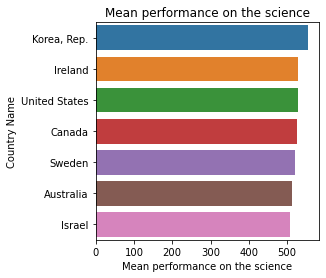

In [113]:
plt.figure(figsize = (4,4))
plt.title("Mean performance on the science")
population = df[(df['Indicator Name'] == 'TIMSS: Mean performance on the science scale for eighth grade students, total')]
population = population.sort_values('Year 2015', ascending=False)
sns.barplot(y=population['Country Name'], x = population['Year 2015'], data = population)

plt.ylabel("Country Name")
plt.xlabel("Mean performance on the science");

Les pays suivants ont un grand potentiel de clients pour nos services : 
+ Sweden
+ Canada
+ Australia
+ United States
+ Ireland
+ Israel
+ Korea,Rep.

In [114]:
df.head()

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289
110,KOR,"Korea, Rep.",Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.527288


In [115]:
df1=df[(df['Indicator Name']=='Population growth (annual %)')]
df1['Year 2015'].max()
df1['Year 2015'].min()
df1['Year 2015'].quantile(q = [0.25,0.5,0.75])
popul_classes = pd.cut(df1['Year 2015'], [0.5272884974077928, 0.790744, 1.057455, 1.336940, 1.98128897562084 ], 
                       labels = [0,1,2,3])

print(popul_classes)

df1['class']=popul_classes.astype(int)
df1.head()


# min     0.5272884974077929
# 0.25    0.790744
# 0.50    1.057455
# 0.75    1.336940
# max     1.98128897562083

93     3
96     1
106    2
107    3
110    0
120    1
123    0
Name: Year 2015, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


<ipython-input-115-d9cf4269db16>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class']=popul_classes.astype(int)


,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015,class
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107,3
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756,1
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772,2
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289,3
110,KOR,"Korea, Rep.",Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.527288,0


In [116]:
df2=df[(df['Indicator Name']=='TIMSS: Mean performance on the mathematics scale for eighth grade students, total')]

df2['Year 2015'].max()
df2['Year 2015'].min()
df2['Year 2015'].quantile(q = [0.25,0.5,0.75])

popul_classes = pd.cut(df2['Year 2015'], [500.0, 508.0, 518.0, 525.0, 607.0], labels = [0,1,2,3])
print(popul_classes)

df2['class']=popul_classes.astype(int)
df2.head() 

# min     501.0
# 0.25    508.0
# 0.50    518.0
# 0.75    525.0
# max     606.0

202    0
203    3
205    2
206    1
209    3
213    0
214    1
Name: Year 2015, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


<ipython-input-116-7b6aef51fcab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class']=popul_classes.astype(int)


,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015,class
202,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,505.0,0
203,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,527.0,3
205,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,523.0,2
206,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,511.0,1
209,KOR,"Korea, Rep.",Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,606.0,3


In [117]:
df3=df[(df['Indicator Name']=='TIMSS: Mean performance on the science scale for eighth grade students, total')]

df3['Year 2015'].max()
df3['Year 2015'].min()
df3['Year 2015'].quantile(q = [0.25,0.5,0.75])

popul_classes = pd.cut(df3['Year 2015'], [506.0, 517.0, 526.0, 530.0, 557.0], labels = [0,1,2,3])
print(popul_classes)

df3['class']=popul_classes.astype(int)
df3.head() 

# min     507.0
# 0.25    517.0
# 0.50    526.0
# 0.75    530.0
# max     556.0

527    0
528    1
530    2
531    0
534    3
538    1
539    2
Name: Year 2015, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


<ipython-input-117-acdcc9387c07>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['class']=popul_classes.astype(int)


,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015,class
527,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,512.0,0
528,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,526.0,1
530,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,530.0,2
531,ISR,Israel,Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,507.0,0
534,KOR,"Korea, Rep.",Learning Outcomes,TIMSS: Mean performance on the science scale f...,TIMSS: Mean performance on the science scale f...,556.0,3


In [118]:
type(df3['Year 2015'].quantile(q = [0.25,0.5,0.75]))

pandas.core.series.Series

In [119]:
df3['Year 2015'].quantile(q = [0.25,0.5,0.75]).array

<PandasArray>
[517.0, 526.0, 530.0]
Length: 3, dtype: float64

In [120]:
df = pd.concat([df1, df2, df3], axis=0)
df.head(30)

,Country Code,Country Name,Topic,Indicator Name,Long definition,Year 2015,class
93,AUS,Australia,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.391107,3
96,CAN,Canada,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.851756,1
106,IRL,Ireland,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.282772,2
107,ISR,Israel,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.981289,3
110,KOR,"Korea, Rep.",Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.527288,0
120,SWE,Sweden,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,1.057455,1
123,USA,United States,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate for year t is th...,0.729732,0
202,AUS,Australia,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,505.000000,0
203,CAN,Canada,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,527.000000,3
205,IRL,Ireland,Learning Outcomes,TIMSS: Mean performance on the mathematics sca...,TIMSS: Mean performance on the mathematics sca...,523.000000,2


In [121]:
score = df.groupby("Country Name", as_index = False).agg({"class" : "sum"}) 
score = score.sort_values(['class'], ascending = False)
score

,Country Name,class
2,Ireland,6
4,"Korea, Rep.",6
1,Canada,5
3,Israel,4
0,Australia,3
6,United States,3
5,Sweden,2


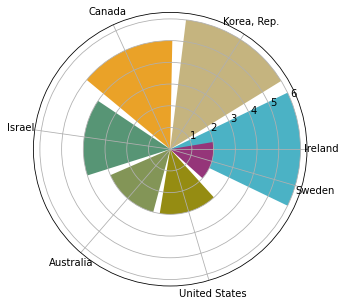

In [122]:
N = 7

plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
colors = np.array(['#4bb2c5','#c5b47f','#EAA228','#579575','#839557','#958c12','#953579'])
bars = plt.bar(score['Country Name'], score['class'], width=(2*np.pi/N), bottom=0.0, color=colors)
plt.show()

Pays prioritaires pour le développement de l'entreprise : 
+ Ireland
+ Korea
+ Rep, Canada.

<AxesSubplot:xlabel='Country Name', ylabel='Year 2015'>

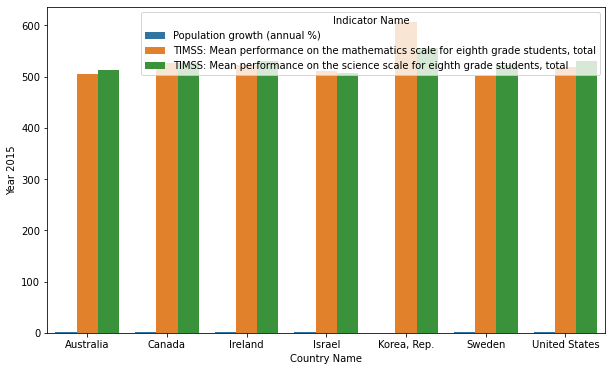

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="Country Name", y="Year 2015", hue= 'Indicator Name', data=df, ax=ax)